In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 연습문제
아래 데이터의 회귀직선을 구해보자

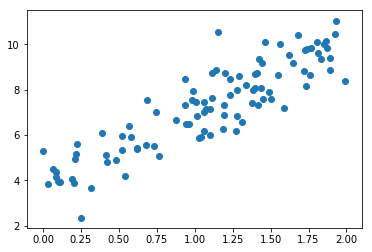

In [9]:
X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

plt.scatter(X,y)
plt.show()

In [13]:
X_b = np.c_[np.ones((100,1)),X]
theta_pred = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_pred

array([[3.85717256],
       [3.13698392]])

In [30]:
y_pred = np.array([np.array([1, 0]).dot(theta_pred), np.array([1, 2]).dot(theta_pred)])
y_pred

array([[ 3.85717256],
       [10.1311404 ]])

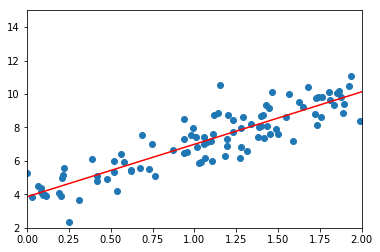

In [22]:
plt.scatter(X,y)
plt.plot([0, 2], y_pred, '-r')
plt.axis([0,2,2,15])
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

[3.85717256]
[[3.13698392]]


In [31]:
print(lin_reg.predict(np.array([[0], 
                                [2]])))

[[ 3.85717256]
 [10.1311404 ]]


### 연습문제2
경사하강법을 이용해 계수 추정치를 구해보자

In [62]:
eta = 0.04 # learning rate
n_iterations = 1000
m = 100 # 관측 갯수

theta = np.random.randn(2,1) # 무작위 위치에서 학습 시작
theta_list = [theta]

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta-eta*gradients
    theta_list.append(theta)
theta

array([[3.85717404],
       [3.13698273]])

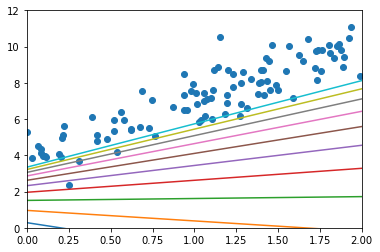

In [75]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_pred = []
for theta in theta_list[:10]:
    y_pred.append(X_new_b.dot(theta))

plt.scatter(X, y)
for i in y_pred:
    plt.plot(X_new, i)
plt.axis([0,2,0,12])
plt.show()  # A regression line approaches the optimal as the learning progresses

### 확률적 경사 하강법 Stochastic Gradient Descent

In [112]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케쥴 하이퍼 파라미터
m = 100

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # 무작위 위치에서 학습 시작
theta_list = [theta]
np.random.seed(12345)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_list.append(theta)
theta

array([[3.84781703],
       [3.11264917]])

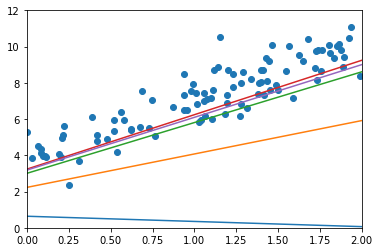

In [113]:
y_pred = []
for theta in theta_list[:5]:
    y_pred.append(X_new_b.dot(theta))

plt.scatter(X, y)
plt.axis([0,2,0,12])
for i in y_pred:
    plt.plot(X_new, i)
plt.show()

In [122]:
from sklearn.linear_model import SGDRegressor
np.random.seed(12345)
sgd_reg = SGDRegressor(max_iter=50, tol=0.001, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.89985903]), array([3.24066517]))

## 다항 회귀

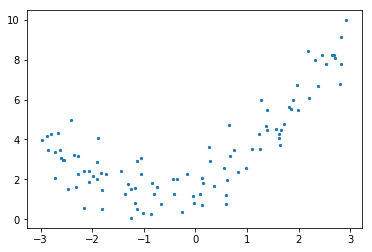

In [187]:
m = 100
np.random.seed(42)
X = np.random.rand(m,1) * 6 - 3
y = 0.5*X*X +X + 2 + np.random.randn(m,1)

plt.scatter(X, y, s=5)
plt.show()

In [151]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X[0]**2, X_poly[0], 

(array([-0.75275929]), array([0.56664654]), array([-0.75275929,  0.56664654]))

In [152]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_ # y 절편, 1차항 계수, 2차항 계수 (2, 1, 0.5)

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

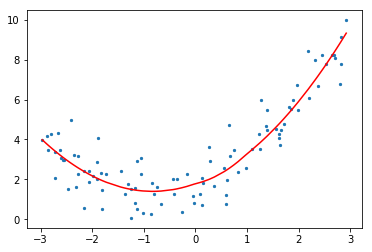

In [209]:
import pandas as pd
y_pred = lin_reg.predict(X_poly)
X_p = np.concatenate((X, y_pred), axis=1)

X_p = np.concatenate((X, y_pred), axis=1)
X_sort = pd.DataFrame(X_p)
X_sorted = X_sort.sort_values(by=0)
X_p_sorted = np.array(X_sorted)

plt.scatter(X,y,s=5)
plt.plot(X_p_sorted[:,0], X_p_sorted[:,1], 'r')
plt.show()

## 조기 종료 early stopping
데이터에 과대적합되지 않도록, 검증셋에서의 오차가 최소가 될 때 멈추는 것.

In [17]:
###### 데이터 생성 ######
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

###### SGD 조기 종료 방법 ######
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 기존에 학습된 파라미터에서부터 학습 시작.
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
best_epoch, best_model

C:\Users\renz\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\renz\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\renz\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in

C:\Users\renz\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\renz\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\renz\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in

C:\Users\renz\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\renz\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\renz\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in

(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
        eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
        learning_rate='constant', loss='squared_loss', max_iter=1,
        n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
        random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
        verbose=0, warm_start=True))

## 로지스틱 회귀
꽃잎의 너비를 기반으로 Iris-Veirginica 감지하는 분류기를 만들어보자.

In [139]:
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))

X = iris["data"][:, 3:]                  # 꽃잎의 너비
y = (iris["target"] == 2).astype(np.int) # Iris-Veirginica면 1, 아니면 0

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


In [28]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

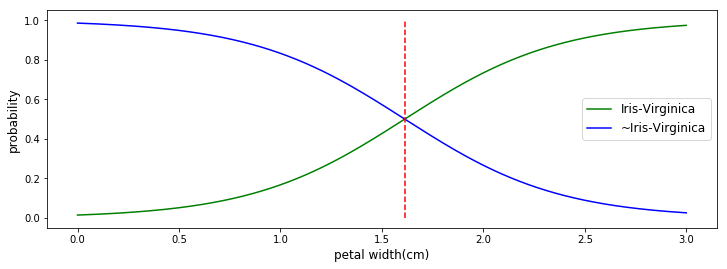

array([1, 0])

In [144]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(12,4))
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b-", label="~Iris-Virginica")
plt.xlabel("petal width(cm)", fontsize=12)
plt.ylabel("probability", fontsize=12)
plt.legend(fontsize=12)

plt.plot((X_new[537,0], X_new[537,0]), (0, 1), 'r--')
plt.show()

log_reg.predict([[1.7], [1.5]]) # 결정경계를 기준으로 클래스가 다르게 분류된다.

## 소프트맥스 회귀
다중 분류를 해보자.

In [128]:
X = iris["data"][:, (2,3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

# multi_class 지정을 안 해주면 OvA 전략을 사용한다. 
# solver는 소프트맥스 회귀를 지원하는 알고리즘으로 선택해야 한다. 
# C는 l2 규제로서, alpha의 역수이다.
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [130]:
softmax_reg.predict([[5, 2]])

array([2])

In [132]:
softmax_reg.predict_proba([[5, 2]]) # Iris-Virginica일 확률이 94%

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [138]:
softmax_reg.coef_ # 각 클래스 별(행)로 특성 가중치 값(=파라미터 값(theta))이 저장되어 있다.

array([[-4.58614563, -2.24129385],
       [ 0.16068263, -2.15860167],
       [ 4.425463  ,  4.39989552]])